# Laboratorium 3

Zadanie 1

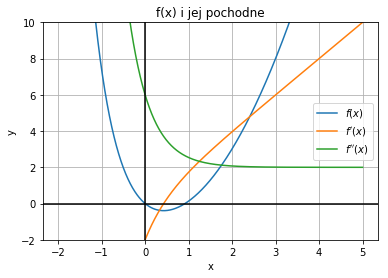

In [11]:
import math
import matplotlib.pyplot as plt
import numpy

def f(x):
    return math.exp(-2*x)+math.pow(x,2)-1

def df(x):
    return 2*(-math.exp(-2*x)+x)

def d2f(x):
    return 4*math.exp(-2*x)+2

x = numpy.linspace(-2,5,5000)
y = [f(i) for i in x]
dy = [df(i) for i in x]
d2y = [d2f(i) for i in x]

plt.figure()
plt.plot(x,y,label='$f(x)$')
plt.plot(x,dy,label='$f\'(x)$')
plt.plot(x,d2y,label='$f\'\'(x)$')
plt.grid()
plt.ylim(-2,10)
plt.title('f(x) i jej pochodne')
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()




Miejsca zerowa znajdują się w okolicach 0 i 1.
Przedziały dla:
1. metody bijekcji : [-0.2, 0.3], [0.7, 1.3]
2. metody siecznych : [-0.2, 0.3], [0.7, 1.3]
3. metody stycznych : [-0.2, 0.3], [0.7, 1.3]

Zadanie 2

In [2]:
#1
def bijekcja(f,a,b,epsilon,max_it):
    if (f(a) * f(b) >= 0): 
        print("Błędne dane") 
        return
    iter = 0
    c = (a+b)/2
    while abs(b-a)>epsilon and iter<max_it: #assuming b>a
        iter+=1
        c = (a+b)/2
        if (f(c)*f(a) < 0):
            b = c
        else:
            a = c
    return c,iter

#2 

Funkcja przyjmuje różne znaki na końcach przedziału: f(a)f(b) < 0

Funkcja jest ciągła na przedziale [a,b].

In [3]:
#3
print(bijekcja(f,-0.2,0.3,math.pow(10,-10),100))
print(bijekcja(f,0.7,1.3,math.pow(10,-10),100))

(1.1641521080463235e-11, 33)
(0.9165625831345097, 33)


In [4]:
#4
import time
print("Pierwiastek 0")
cur = time.time()
own_function = bijekcja(f,-0.2,0.3,math.pow(10,-10),100)
print(time.time()-cur)
import scipy.optimize as sp
cur = time.time()
builtin_function = sp.bisect(f,-0.2,0.3)
print(time.time()-cur)
print("Pierwiastek 0,9")
cur = time.time()
own_function = bijekcja(f,0.7,1.3,math.pow(10,-10),100)
print(time.time()-cur)

cur = time.time()
builtin_function = sp.bisect(f,0.7,1.3)
print(time.time()-cur)

Pierwiastek 0
0.00011563301086425781
0.0002448558807373047
Pierwiastek 0,9
0.00020933151245117188
0.00015401840209960938


Zadanie 3

In [5]:
#1
def newton(f,df,x0,epsilon,max_it):
    x = x0 - f(x0)/df(x0)
    y = x0
    iter =0
    while abs(x-y)>epsilon and iter<max_it:
        iter+=1
        y = x
        x = y - f(y)/df(y)
    return x,iter

#2 

Funkcja ma różne znaki na krańcach przedziału, tj. f (a) · f (b) < 0.

Pierwsza i druga pochodna funkcji mają stały znak w tym przedziale.

Pierwsza i druga pochodna funkcji są ciągłe na [a,b].

Funkcja jest ciągła na [a,b].

In [6]:
#3
print(newton(f,df,-0.2,math.pow(10,-10),100))
print(newton(f,df,1.3,math.pow(10,-10),100))

(1.513707656052328e-17, 5)
(0.9165625831056982, 5)


In [7]:
#4
print("Pierwiastek 0")
cur = time.time()
newton(f,df,-0.2,math.pow(10,-10),100)
print(time.time()-cur)
cur = time.time()
sp.newton(f,-0.2,df)
print(time.time()-cur)
print("Pierwiastek 0,9")
cur = time.time()
newton(f,df,1.3,math.pow(10,-10),100)
print(time.time()-cur)
cur = time.time()
sp.newton(f,1.3,df)
print(time.time()-cur)

Pierwiastek 0
0.00011086463928222656
8.463859558105469e-05
Pierwiastek 0,9
9.179115295410156e-05
0.00010013580322265625


Zadanie 4

In [8]:
#1
def sieczne(f,x0,x1,epsilon,max_it):
    x0, x1 = x1, x0 - f(x0)*(x1-x0)/(f(x1)-f(x0))
    iter =0
    while abs(x1-x0)>epsilon and iter<max_it:
        iter+=1
        x0, x1 = x1, x0 - f(x0)*(x1-x0)/(f(x1)-f(x0))
    return x1,iter

#2

Funkcja ma różne znaki na krańcach przedziału, tj. f (a) · f (b) < 0.

Pierwsza i druga pochodna funkcji mają stały znak w tym przedziale.

Pierwsza i druga pochodna funkcji są ciągłe na [a,b].

Funkcja jest ciągła na [a,b].

In [9]:
#3
print(sieczne(f,-0.2,0.3,math.pow(10,-10),100))
print(sieczne(f,0.7,1.3,math.pow(10,-10),100))

(9.708142393502055e-18, 7)
(0.9165625831056982, 6)


In [10]:
#4
print("Pierwiastek 0")
cur = time.time()
sieczne(f,-0.2,0.3,math.pow(10,-10),100)
print(time.time()-cur)
cur = time.time()
sp.newton(f,-0.2,df)
print(time.time()-cur)
print("Pierwiastek 0,9")
cur = time.time()
sieczne(f,0.7,1.3,math.pow(10,-10),100)
print(time.time()-cur)
cur = time.time()
sp.newton(f,1.3,df)
print(time.time()-cur)

Pierwiastek 0
0.00024509429931640625
0.00021123886108398438
Pierwiastek 0,9
0.00019788742065429688
0.00020003318786621094


#5
Pierwiastek      0   0,9

Metoda bisekcji: 33, 33 iteracje 

Metoda Newtona: 5, 4 iteracje

Metoda siecznych: 7, 6 iteracji

Widać, że metoda bisekcji jest najwolniejsza potem m. siecznych, a najszybsza jest m. Newtona.